In [2]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Importing the dataset
DATASET_COLUMNS=['Target','Id','Date','Flag','User','Tweets']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('twittersentiment.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(3)

,Target,Id,Date,Flag,User,Tweets
979457,4,1833929862,Mon May 18 00:58:59 PDT 2009,NO_QUERY,susiewardie,@simonrim Fantastic show!!! Glad you're back ...
1540783,4,2180550365,Mon Jun 15 10:37:22 PDT 2009,NO_QUERY,erika3101,@greggarbo http://twitpic.com/6xen0 - PLEASE C...
754415,0,2287982413,Mon Jun 22 18:33:34 PDT 2009,NO_QUERY,TimaFBaby,Everybody is @ Garden...


In [4]:
df.head()

,Target,Id,Date,Flag,User,Tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns

Index(['Target', 'Id', 'Date', 'Flag', 'User', 'Tweets'], dtype='object')

In [6]:
print('length of data is', len(df))


length of data is 1600000


In [7]:
df. shape


(1600000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   Id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Tweets  1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
df.describe()

,Target,Id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [10]:
df.dtypes

Target     int64
Id         int64
Date      object
Flag      object
User      object
Tweets    object
dtype: object

In [11]:
np.sum(df.isnull().any(axis=1))


0

In [12]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [13]:
df['Target'].unique()

array([0, 4], dtype=int64)

In [14]:
df['Target'].nunique()


2

In [15]:
def cleantext(text):
    text = re.sub('@[\w]+','',text)
    text = re.sub('#', '' ,text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\s+','',text)
    
    return text

df['CleanTweets'] = df['Tweets'].apply(cleantext)
df.head()

,Target,Id,Date,Flag,User,Tweets,CleanTweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [ ]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
df['Subjectivity'] = df['CleanTweets'].apply(getSubjectivity) 


def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Polarity'] = df['CleanTweets'].apply(getPolarity)  

df.drop('Tweets', axis=1).head()
df.sample(15)

In [72]:
df['Target'] = df['Target'].replace(4 , 1)
df

,Target,Id,Date,Flag,User,Tweets,CleanTweets,Subjectivity,Polarity,Analysis
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...",0.633333,0.216667,Positive
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neutral
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,0.500000,0.500000,Positive
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.400000,0.200000,Positive
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,Negative
...,...,...,...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...,0.300000,1.000000,Positive
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...,0.522500,0.290000,Positive
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...,0.500000,0.200000,Positive
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...,1.000000,1.000000,Positive


In [73]:
def getAnalysis(score):
    label=""
    if(score < 0):
        label = 'Negative'
    elif(score == 0):
        label = 'Neutral'
    else:
        label = "Positive"
    return(label)

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Target,Id,Date,Flag,User,Tweets,CleanTweets,Subjectivity,Polarity,Analysis
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...",0.633333,0.216667,Positive
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neutral
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,0.500000,0.500000,Positive
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.400000,0.200000,Positive
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,Negative
...,...,...,...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...,0.300000,1.000000,Positive
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...,0.522500,0.290000,Positive
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...,0.500000,0.200000,Positive
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...,1.000000,1.000000,Positive


In [74]:
data=df[['Target','User','Tweets','CleanTweets','Polarity','Analysis']]

In [75]:
data_pos = data[df['Analysis'] == 'Positive']
data_neg = data[df['Analysis'] == 'Negative']
data_neutral = data[df['Analysis'] == 'Neutral']
data

,Target,User,Tweets,CleanTweets,Polarity,Analysis
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...",0.216667,Positive
1,0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,0.000000,Neutral
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,0.500000,Positive
3,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200000,Positive
4,0,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",-0.625000,Negative
...,...,...,...,...,...,...
1599995,1,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up. Having no school is the best fee...,1.000000,Positive
1599996,1,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDB.com - Very cool to hear old Walt interv...,0.290000,Positive
1599997,1,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover? Ask me f...,0.200000,Positive
1599998,1,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time!!! ...,1.000000,Positive


In [76]:
dataset = pd.concat([data_pos, data_neg, data_neutral])
dataset

,Target,User,Tweets,CleanTweets,Polarity,Analysis
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...",0.216667,Positive
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,0.500000,Positive
3,0,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.200000,Positive
5,0,joy_wolf,@Kwesidei not the whole crew,not the whole crew,0.200000,Positive
7,0,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"hey long time no see! Yes.. Rains a bit ,onl...",0.270833,Positive
...,...,...,...,...,...,...
1599981,1,youtubelatest,Another Commenting Contest! [;: Yay!!! http:/...,Another Commenting Contest! [;: Yay!!! http:/...,0.000000,Neutral
1599982,1,Mandi_Davenport,@thrillmesoon i figured out how to see my twee...,i figured out how to see my tweets and facebo...,0.000000,Neutral
1599985,1,LISKFEST,"if ur the lead singer in a band, beware fallin...","if ur the lead singer in a band, beware fallin...",0.000000,Neutral
1599990,1,razzberry5594,WOOOOO! Xbox is back,WOOOOO! Xbox is back,0.000000,Neutral


In [77]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
data_neutral = data_neutral.iloc[:int(20000)]

In [78]:
dataset['CleanTweets']=dataset['CleanTweets'].str.lower()
dataset['CleanTweets'].tail()

1599981    another commenting contest! [;: yay!!!  http:/...
1599982     i figured out how to see my tweets and facebo...
1599985    if ur the lead singer in a band, beware fallin...
1599990                                wooooo! xbox is back 
1599993                                                     
Name: CleanTweets, dtype: object

In [79]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [80]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['CleanTweets'] = dataset['CleanTweets'].apply(lambda text: cleaning_stopwords(text))
dataset['CleanTweets'].head()

0    http://twitpic.com/2y1zl - awww, that's bummer...
2    dived many times ball. managed save 50% rest g...
3                     whole body feels itchy like fire
5                                       not whole crew
7    hey long time no see! yes.. rains bit ,only bi...
Name: CleanTweets, dtype: object

In [81]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['CleanTweets']= dataset['CleanTweets'].apply(lambda x: cleaning_punctuations(x))
dataset['CleanTweets'].tail()

1599981    another commenting contest  yay httptinyurlcom...
1599982    figured see tweets facebook status updates set...
1599985    ur lead singer band beware falling prey lsd qu...
1599990                                     wooooo xbox back
1599993                                                     
Name: CleanTweets, dtype: object

In [82]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['CleanTweets'] = dataset['CleanTweets'].apply(lambda x: cleaning_repeating_char(x))
dataset['CleanTweets'].tail()

1599981    another commenting contest  yay httptinyurlcom...
1599982    figured see tweets facebook status updates set...
1599985    ur lead singer band beware falling prey lsd qu...
1599990                                     wooooo xbox back
1599993                                                     
Name: CleanTweets, dtype: object

In [83]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['CleanTweets'] = dataset['CleanTweets'].apply(lambda x: cleaning_URLs(x))
dataset['CleanTweets'].tail()

1599981    another commenting contest  yay httptinyurlcom...
1599982    figured see tweets facebook status updates set...
1599985    ur lead singer band beware falling prey lsd qu...
1599990                                     wooooo xbox back
1599993                                                     
Name: CleanTweets, dtype: object

In [84]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['CleanTweets'] = dataset['CleanTweets'].apply(lambda x: cleaning_numbers(x))
dataset['CleanTweets'].tail()

1599981    another commenting contest  yay httptinyurlcom...
1599982    figured see tweets facebook status updates set...
1599985    ur lead singer band beware falling prey lsd qu...
1599990                                     wooooo xbox back
1599993                                                     
Name: CleanTweets, dtype: object

<Axes: xlabel='Analysis', ylabel='count'>

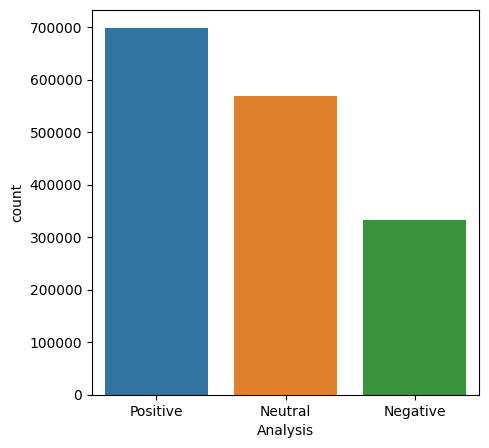

In [85]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Analysis',data=df,hue='Analysis')

Text(0.5, 1.0, 'DISTRIBUTION OF ANALYSIS')

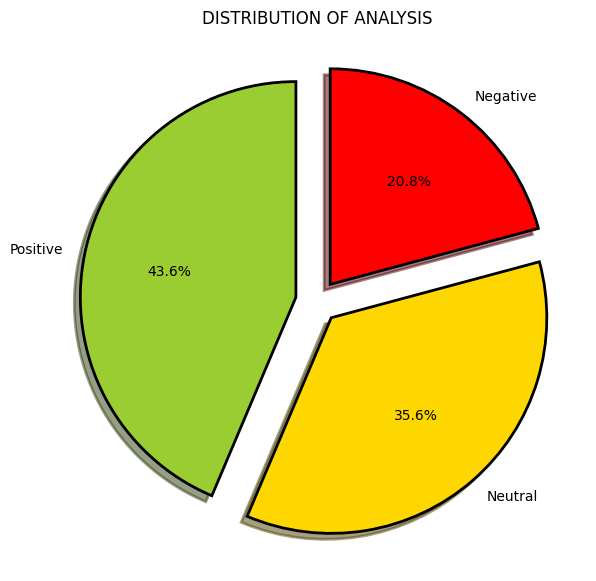

In [86]:
fig = plt.figure(figsize=(7,7))
colors=("yellowgreen", "gold","red")
wp={'linewidth':2, 'edgecolor':'black'}
tags=df['Analysis'].value_counts()
explode =(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True, colors= colors,
         startangle = 90, wedgeprops= wp, explode = explode, label = '' )
plt.title("DISTRIBUTION OF ANALYSIS")

In [87]:
postweet = df[df.Analysis == 'Positive']
postweet = postweet.sort_values(['Polarity'],ascending = False)
postweet.head(3)

,Target,Id,Date,Flag,User,Tweets,CleanTweets,Subjectivity,Polarity,Analysis
1492987,1,2069415989,Sun Jun 07 15:50:19 PDT 2009,NO_QUERY,Sunkissed876,@Ladylicious_K woman! u better be payin attent...,woman! u better be payin attention!!!!!!!!!!,0.5,1.0,Positive
1342580,1,2032886413,Thu Jun 04 11:54:45 PDT 2009,NO_QUERY,inellezshayra,"Oh, I forgot, today was Elaine's birthday! Hap...","Oh, I forgot, today was Elaine's birthday! Hap...",1.0,1.0,Positive
161315,0,1957272236,Fri May 29 00:00:45 PDT 2009,NO_QUERY,TOM_HARDY,wishing i had marvelous misadventures of flap ...,wishing i had marvelous misadventures of flap ...,1.0,1.0,Positive


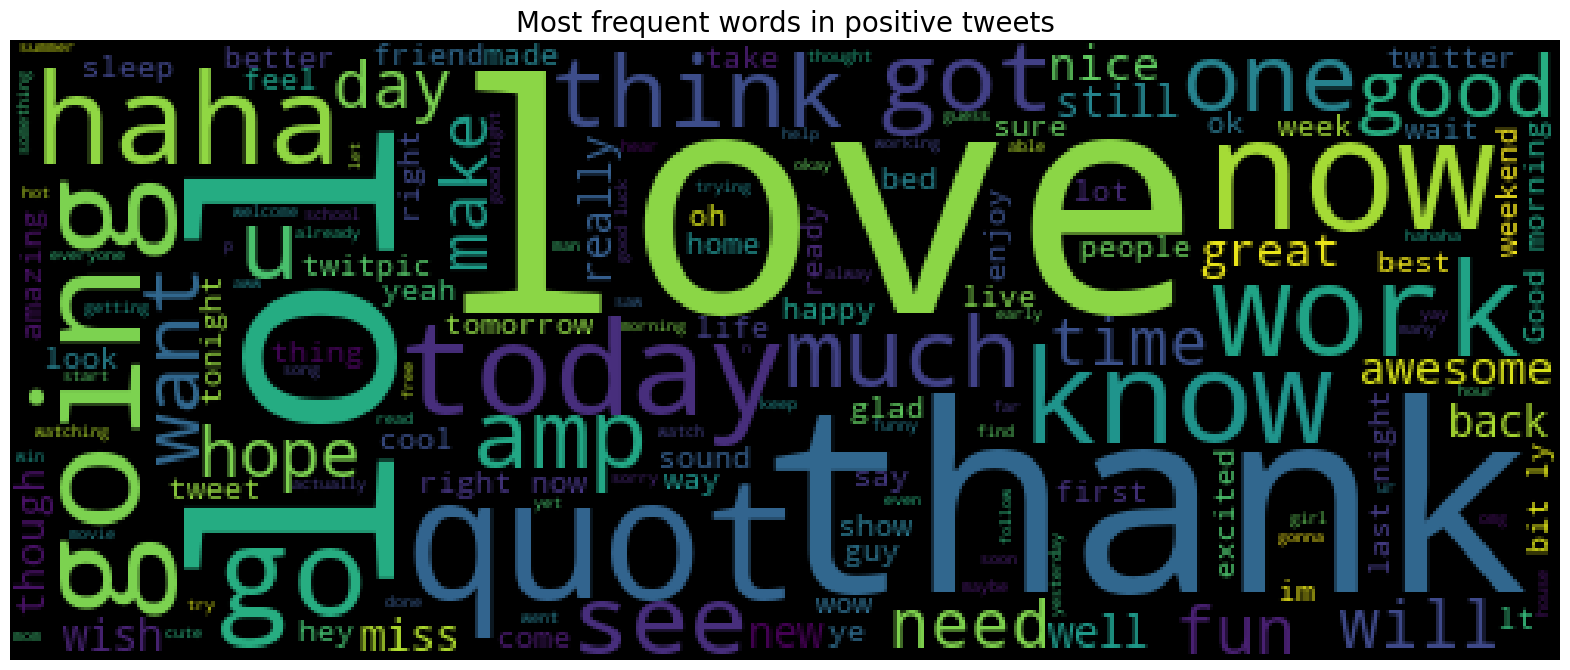

In [88]:
text = ''.join([word for word in postweet['Tweets']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words = 500 , width = 500 , height = 200).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most frequent words in positive tweets", fontsize=20)
plt.show()

In [89]:
negtweet = df[df.Analysis == 'Negative']
negtweet = negtweet.sort_values(['Polarity'],ascending = False)
negtweet.head(3)

,Target,Id,Date,Flag,User,Tweets,CleanTweets,Subjectivity,Polarity,Analysis
503664,0,2187912773,Mon Jun 15 21:00:03 PDT 2009,NO_QUERY,luLuisawesome,@ccjxo no shit chemistry is difficult more lik...,no shit chemistry is difficult more like chem...,0.669841,-3.965082e-18,Negative
49437,0,1678147474,Sat May 02 05:41:23 PDT 2009,NO_QUERY,c_lightning,Is FUCK how many more times is this gonna happ...,Is FUCK how many more times is this gonna happ...,0.533333,-4.625929e-18,Negative
271288,0,1989992687,Mon Jun 01 03:31:07 PDT 2009,NO_QUERY,Caraa_x,Gonna have a fag then gotta do some cleaning :...,Gonna have a fag then gotta do some cleaning :...,0.766667,-4.625929e-18,Negative


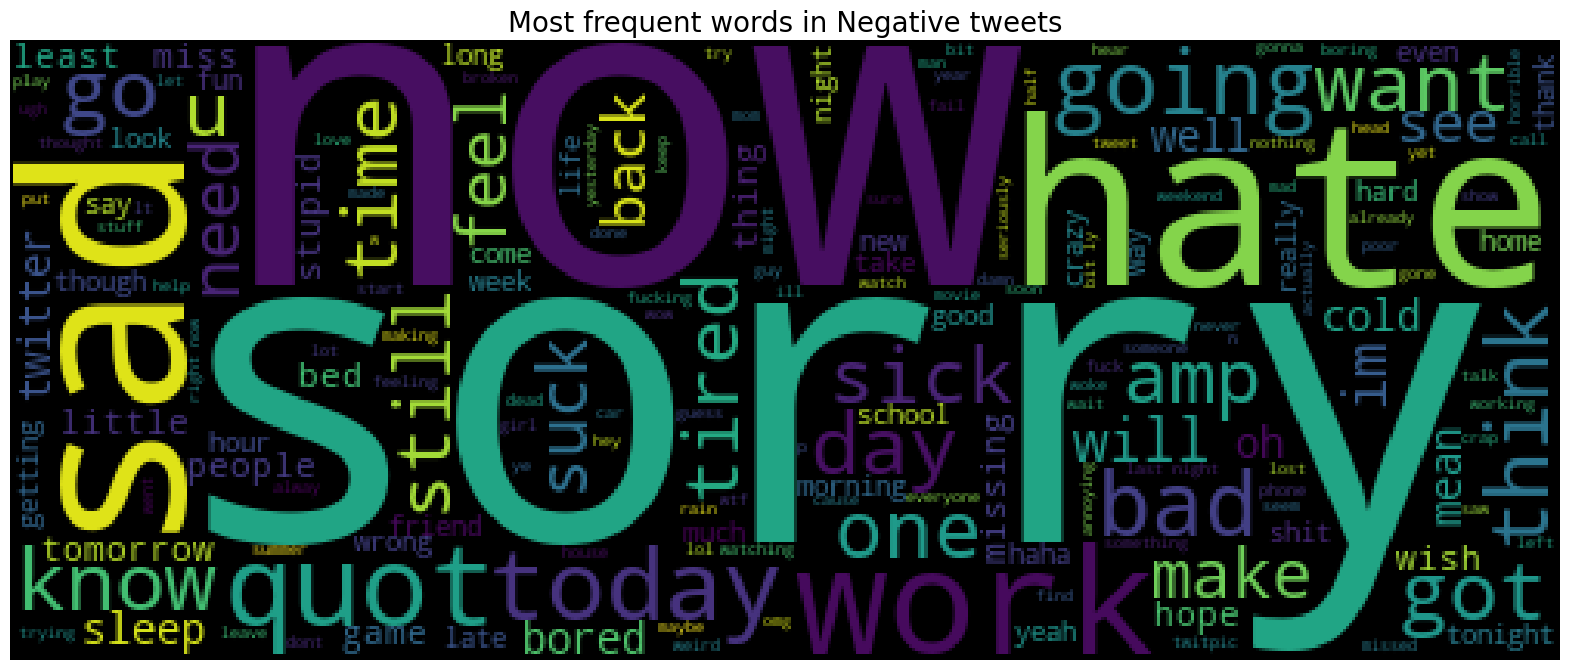

In [90]:
text = ''.join([word for word in negtweet['Tweets']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words = 500 , width = 500 , height = 200).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most frequent words in Negative tweets", fontsize=20)
plt.show()

In [91]:
neutraltweet = df[df.Analysis == 'Neutral']
neutraltweet = neutraltweet.sort_values(['Polarity'],ascending = False)
neutraltweet.head(3)

,Target,Id,Date,Flag,User,Tweets,CleanTweets,Subjectivity,Polarity,Analysis
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,0.0,0.0,Neutral
1050664,1,1960821471,Fri May 29 08:33:23 PDT 2009,NO_QUERY,mattmccall,"@littlegrasshop I already have one, just forgo...","I already have one, just forgot them at home....",0.0,0.0,Neutral
1050648,1,1960820951,Fri May 29 08:33:21 PDT 2009,NO_QUERY,slm1976,@jthindman I can go for that,I can go for that,0.0,0.0,Neutral


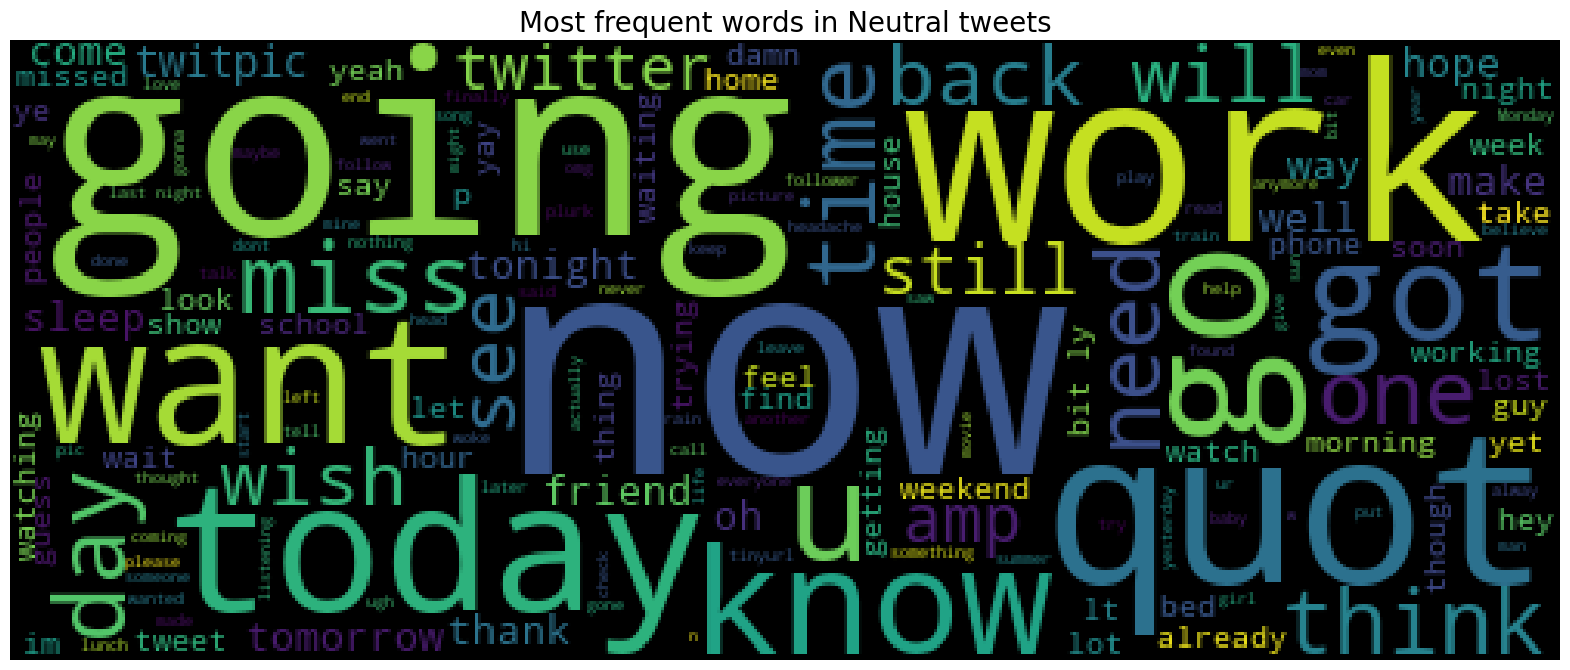

In [92]:
text = ''.join([word for word in neutraltweet['Tweets']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words = 500 , width = 500 , height = 200).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most frequent words in Neutral tweets", fontsize=20)
plt.show()

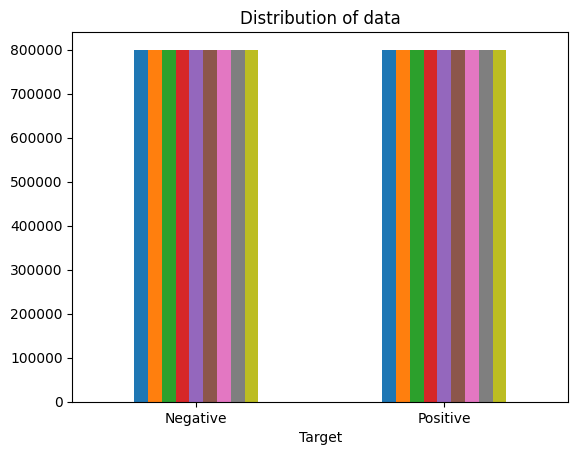

In [93]:
# Plotting the distribution for dataset.
ax = df.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['Tweets']), list(df['Target'])

<Axes: xlabel='Target', ylabel='count'>

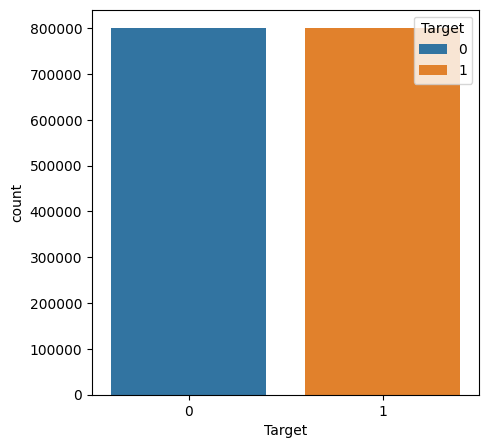

In [94]:
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Target', data=df, hue='Target')

In [95]:
data['Target'].unique()

array([0, 1], dtype=int64)

In [96]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['CleanTweets']= dataset['CleanTweets'].apply(lambda x: stemming_on_text(x))
dataset['CleanTweets'].head()

0    httptwitpiccomzl  a s bummer shoulda got david...
2    dived many times ball managed save  rest go bo...
3                     whole body feels itchy like fire
5                                       not whole crew
7    hey long time no see yes rains bit only bit lo...
Name: CleanTweets, dtype: object

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['CleanTweets'] = dataset['CleanTweets'].apply(lambda x: lemmatizer_on_text(x))
dataset['CleanTweets'].head()

In [98]:
X=data.CleanTweets
Y=data.Target
Y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: Target, Length: 1600000, dtype: int64

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
c_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
count=c_vectorizer.fit_transform(df['CleanTweets'])
print('success')

success


In [100]:
count

<1600000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6594466 stored elements in Compressed Sparse Row format>

In [101]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , Y, test_size = 0.05, random_state =26105111)
print('finish')

finish


In [102]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print("yes")

yes


In [103]:
#print(X_train)
print(y_test)

1562805    1
1463536    1
1253186    1
723307     0
1076693    1
          ..
97603      0
635111     0
1063228    1
314151     0
279086     0
Name: Target, Length: 80000, dtype: int64


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [105]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
print("yes")

yes


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



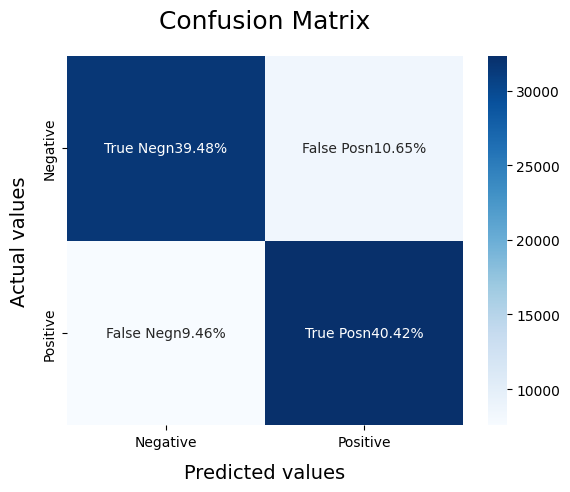

In [106]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [107]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc

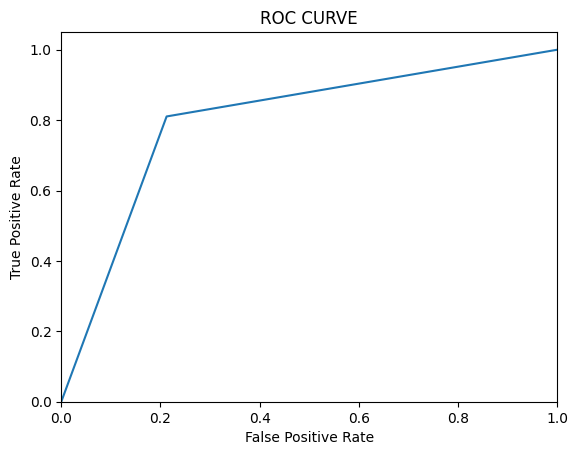

In [109]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
#plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           4       0.81      0.82      0.82     39900

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



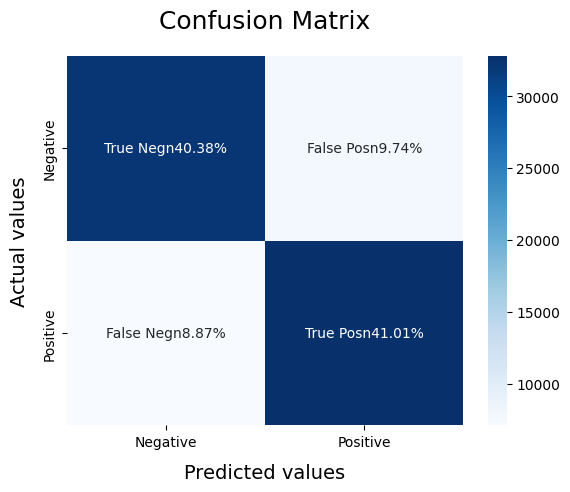

In [51]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

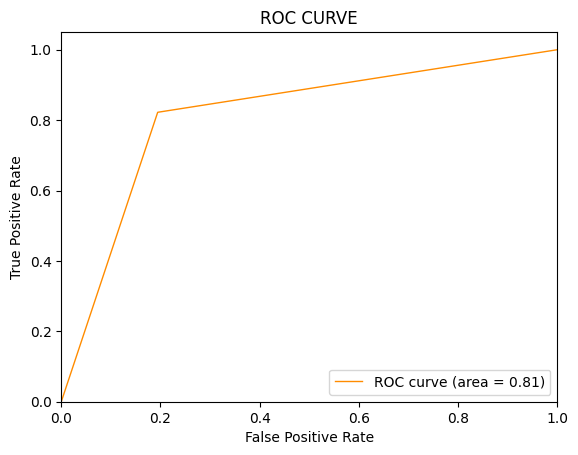

In [111]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40100
           4       0.82      0.83      0.83     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



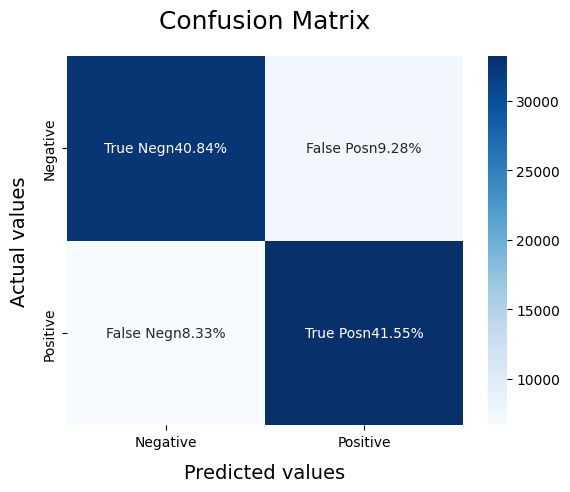

In [52]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

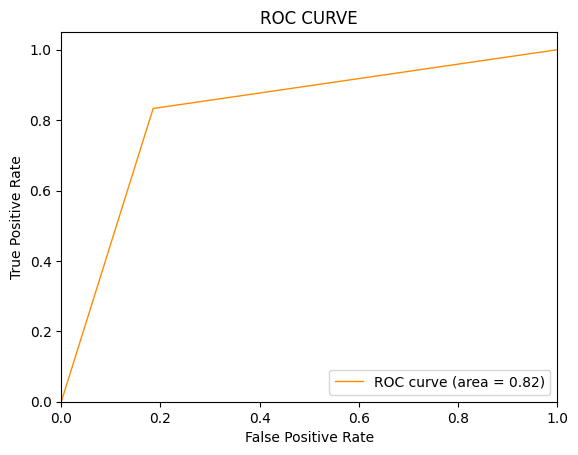

In [112]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()